# Importing Libraries 

In [1]:
#import libraies
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import string

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Data Extraction and Understanding Data

In [2]:
#import data files
train= pd.read_csv("Train.csv")

test =pd.read_csv("Test.csv")

In [3]:
train.head(10)


,Text_ID,Product_Description,Product_Type,Sentiment
0,3057,The Web DesignerÛªs Guide to iOS (and Android...,9,2
1,6254,RT @mention Line for iPad 2 is longer today th...,9,2
2,8212,Crazy that Apple is opening a temporary store ...,9,2
3,4422,The lesson from Google One Pass: In this digit...,9,2
4,5526,RT @mention At the panel: &quot;Your mom has a...,9,2
5,6064,RT @mention I think my effing hubby is in line...,6,1
6,7713,&quot;Android users are not iPhone users. (The...,9,2
7,2975,Wow! RT@mention We interrupt your regularly sc...,9,3
8,818,Google to Launch New Social Network Called Cir...,9,2
9,1318,@mention Welcome! Enjoy #Sxsw and ride anywhe...,9,2


In [4]:
test.head()

,Text_ID,Product_Description,Product_Type
0,5786,RT @mention Going to #SXSW? The new iPhone gui...,7
1,5363,RT @mention 95% of iPhone and Droid apps have ...,9
2,6716,RT @mention Thank you to @mention for letting ...,9
3,4339,#Thanks @mention we're lovin' the @mention app...,7
4,66,At #sxsw? @mention / @mention wanna buy you a ...,9


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Text_ID              6364 non-null   int64 
 1   Product_Description  6364 non-null   object
 2   Product_Type         6364 non-null   int64 
 3   Sentiment            6364 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 199.0+ KB


In [6]:
train.shape

(6364, 4)

In [7]:
train['Product_Type'].unique()

array([9, 6, 7, 2, 8, 3, 0, 5, 1, 4])

In [8]:
from collections import Counter
count=Counter(train['Product_Type']).values() # counts the elements' frequency

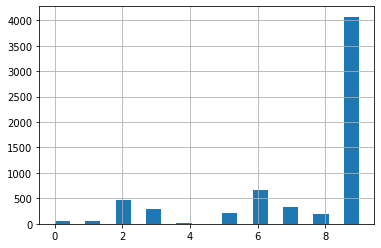

In [9]:
# Plot Histogram on Product types
train['Product_Type'].hist(bins=20)


'''product 9 has maximum reviews and product 4 has least reviews'''

In [10]:
train.head(10)

,Text_ID,Product_Description,Product_Type,Sentiment
0,3057,The Web DesignerÛªs Guide to iOS (and Android...,9,2
1,6254,RT @mention Line for iPad 2 is longer today th...,9,2
2,8212,Crazy that Apple is opening a temporary store ...,9,2
3,4422,The lesson from Google One Pass: In this digit...,9,2
4,5526,RT @mention At the panel: &quot;Your mom has a...,9,2
5,6064,RT @mention I think my effing hubby is in line...,6,1
6,7713,&quot;Android users are not iPhone users. (The...,9,2
7,2975,Wow! RT@mention We interrupt your regularly sc...,9,3
8,818,Google to Launch New Social Network Called Cir...,9,2
9,1318,@mention Welcome! Enjoy #Sxsw and ride anywhe...,9,2


# Data Cleaning

**importing libraries**

In [11]:
import re
import nltk
import string
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**cleaning for train data**

In [12]:
corpus = list()
for i in range(0,6364):
  review=re.sub('[,./?""'':;{}[]|\+=-_()*&^%$@!`~<>]','',train['Product_Description'][i])
  review= re.sub('[\W_]+', ' ',review)
  review= re.sub('[ûª û]',' ',review)
  review=''.join(filter(lambda x: not x.isdigit(), review)) 
  review=review.lower()
  review=review.split()
  ps=PorterStemmer()
  stop_words=stopwords.words('english')
  stop_words.remove('not')
  review=[ps.stem(word) for word in review if not word in stop_words]
  review=' '.join(review)
  corpus.append(review)
  

In [13]:
test.shape

(2728, 3)

**cleaning for test data**

In [14]:

corpus_test = list()
for i in range(0,2728):
  review=re.sub('[,./?""'':;{}[]|\+=-_()*&^%$@!`~<>]','',test['Product_Description'][i])
  review= re.sub('[\W_]+', ' ',review)
  review= re.sub('[ûª û]',' ',review)
  review=''.join(filter(lambda x: not x.isdigit(), review)) 
  review=review.lower()
  review=review.split()
  ps=PorterStemmer()
  stop_words=stopwords.words('english')
  stop_words.remove('not')
  review=[ps.stem(word) for word in review if not word in stop_words]
  review=' '.join(review)
  corpus_test.append(review)
    


In [15]:
print(corpus_test)

['rt mention go sxsw new iphon guid austin mention free march hard beat free lp', 'rt mention iphon droid app less download total sxsw', 'rt mention thank mention let test drive car appl store let hope fix phone sxsw', 'thank mention lovin mention app updat iphon sure download amp familiar w sxsw usguy', 'sxsw mention mention wanna buy drink pm fado th link join us', 'rate gsd ampm idea citi llc star mention quothotspot sxsw parti epic quot link', 'mention make new fan friend hope rt mention hang six loung rooftop googleblogg parti gr dj sxsw', 'want chanc win ipad sxsw visit aquent booth link', 'mention sure use free app check band sxsw link', 'free sxsw music sampler itun includ mention barton hollow open itun link', 'turn twitter sxsw ipad forgotten', 'rt mention mention love mention mention sxsw quotappl come w cool technolog one ever heard go confer quot', 'crazi ipad sxsw mention appl store sxsw link', 'tri steve wozniak drink free thank googl hcker sxsw mention speakeasi link', 

In [16]:
print(corpus)

['web design û guid io android app today mention link sxsw', 'rt mention line ipad longer today yesterday sxsw get line today fun', 'crazi appl open temporari store austin tomorrow handl rabid sxsw eye pad seeker', 'lesson googl one pass digit environ user want purchas across everi platform one tool sxsw elonsxsw', 'rt mention panel quotyour mom ipad design boomer quot sxsw', 'rt mention think ef hubbi line ipad someon point toward line wife number sxswi sxsw', 'quotandroid user not iphon user use option menu contextu menu quot mention sxsw', 'wow rt mention interrupt regularli schedul sxsw geek program big news link googl circl', 'googl launch new social network call circl possibl today link link sxsw', 'mention welcom enjoy sxsw ride anywher austin dwnld groundlink applink booth', 'rt mention appl plan keep austin wire open pop appl store sxsw link', 'yeay rt mention new ubersoci iphon app store includ uberguid sxsw sponsor masha link', 'know sxsw season app updat whenev open iphon a

### Feature Extraction (Count Vectorizer)

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer(max_features=3336,ngram_range=(1, 2),min_df=5)
x_train= cv.fit_transform(corpus).toarray()
y_train = train.iloc[:,-1].values 


In [18]:
cv= CountVectorizer(max_features=3336)
x_test= cv.fit_transform(corpus_test).toarray()



In [19]:
len(x_train[0])

3336

In [20]:
len(x_test[0])

3336

# Navie Bayes Model 

In [21]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

# K-Fold Cross Validation(GNB)

In [22]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# create dataset
x_gnb, y_gnb = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(classifier, x_gnb, y_gnb, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.826 (0.040)


In [23]:
print("Mean_XGB_Acc : ", scores.mean())

Mean_XGB_Acc :  0.826


## Prediction via Navie Bayes

In [24]:
y_prednb = classifier.predict(x_test)
print(y_prednb)

[2 2 2 ... 2 2 2]


# Support Vector Machine (Non- linear)

In [25]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') #  Linear 

#Train the model using the training sets
clf.fit(x_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Prediction via SVM

In [26]:
y_predsvm= clf.predict(x_test)
print(y_predsvm)


[1 2 1 ... 2 3 3]


# K-Fold Cross Validation(SVM)

In [27]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# create dataset
x_train, y_train = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(clf, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.871 (0.028)
